# Open Text Tokenization
We started by loading the survey data from a CSV file containing participants' responses about their strategies for limiting social media access. Once the data was successfully loaded, we moved on to the data cleaning stage. This step involved removing unnecessary characters and blank responses, ensuring that only meaningful responses were retained for further analysis.

Next, we processed the cleaned data by breaking down each response into individual words, a process known as tokenization. We chose tokenization because it allowed us to convert each response into smaller, manageable units (tokens), making it easier to identify specific keywords and patterns mentioned by participants. This approach enabled us to systematically analyze the text, ensuring that we captured every relevant detail about their strategies.

We then assigned initial codes to each response based on predefined keywords related to various strategies, such as "time management," "tools," and "distraction." By checking each response for these keywords, we could assign appropriate codes that represented the strategies mentioned by participants. After assigning the initial codes, we mapped them to broader themes like "Time Management," "Application Limits," and "No/Nothing Responses." This step helped group the responses into more comprehensive categories, providing a clearer understanding of the strategies used. Finally, we visualized the frequency of each theme using a bar chart, which revealed that "Time Management," "No/Nothing Responses," and "Distraction Techniques" were the most common methods people use to limit their social media access. This systematic approach allowed us to gain valuable insights into participants' strategies for managing their social media usage.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Step 1: Load Your Data
# Load the CSV file using a different encoding
df = pd.read_csv('transdata-1.csv')

# Display the first few rows of the initial DataFrame
print("Initial DataFrame:")
print(df.head())  # Display the first few rows

<ipython-input-1-9a0c5c398a95>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Initial DataFrame:
  the age:   Gender:   Area: Current educational level: marital status:  \
0    13-17  feminine  Riyadh  High school or equivalent        bachelor   
1    18-24      male  Riyadh          Bachelor's degree        bachelor   
2    18-24  feminine  Riyadh          Bachelor's degree        bachelor   
3    18-24  feminine  Riyadh  High school or equivalent        bachelor   
4    35-44  feminine  Riyadh          Bachelor's degree         married   

      Employment status: Do you use social media applications?  \
0                student                                   Yes   
1           Not employed                                   Yes   
2                student                                   Yes   
3                student                                   Yes   
4  Housewife, unemployed                                   Yes   

             What social media platforms do you use?  \
0  Instagram, X (Twitter), TikTok, Snapchat, Yout...   
1  Instagram, X (Twit

In [2]:
# Step 2: Clean the Data
def clean_response(text):
    text = str(text).strip()
    if text in ['.', '', 'A', 'B', '??', '...']:
        return None
    return text

df['cleaned_response'] = df['What methods, if any, do you use to limit your social media access?'].apply(clean_response)
df = df.dropna(subset=['cleaned_response'])

# Display the DataFrame after cleaning
print("\nDataFrame after cleaning:")
print(df[['What methods, if any, do you use to limit your social media access?', 'cleaned_response']].head())



DataFrame after cleaning:
  What methods, if any, do you use to limit your social media access?  \
0                                            nothing                    
1  Use the restrictions in Apple settings (from S...                    
2  Setting limits on applications, placing the de...                    
4                       Leave the device in the room                    
6          Leave your cell phone and self-flagellate                    

                                    cleaned_response  
0                                            nothing  
1  Use the restrictions in Apple settings (from S...  
2  Setting limits on applications, placing the de...  
4                       Leave the device in the room  
6          Leave your cell phone and self-flagellate  


In [3]:
# Step 3: Tokenization
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

df.loc[:, 'tokens'] = df['cleaned_response'].apply(tokenize)

# Display the DataFrame after tokenization
print("\nDataFrame after tokenization:")
print(df[['cleaned_response', 'tokens']].head())


DataFrame after tokenization:
                                    cleaned_response  \
0                                            nothing   
1  Use the restrictions in Apple settings (from S...   
2  Setting limits on applications, placing the de...   
4                       Leave the device in the room   
6          Leave your cell phone and self-flagellate   

                                              tokens  
0                                          [nothing]  
1  [use, the, restrictions, in, apple, settings, ...  
2  [setting, limits, on, applications, placing, t...  
4                [leave, the, device, in, the, room]  
6  [leave, your, cell, phone, and, self, flagellate]  


In [5]:
# Step 4: Generate Initial Codes
initial_codes = {
    'time_management': ['limit', 'time', 'hours', 'schedule', 'timer'],
    'tools': ['apps', 'blocker', 'delete'],
    'personal_strategies': ['detox', 'break', 'reward', 'go out', 'hobbies'],
    'distraction': ['busy', 'occupy', 'family', 'friends', 'chores'],
    'mindfulness': ['reflect', 'think', 'impact'],
    'social_interaction': ['gathering', 'friends', 'family'],
    'personal_control': ['control', 'decide', 'goals'],
    'mixed_feelings': ['enjoy', 'positive', 'reward'],
    'no_nothing': ['no', 'nothing'],  # New entry for "no" and "nothing"
}

def code_response(tokens):
    codes = []
    for code, keywords in initial_codes.items():
        if any(keyword in tokens for keyword in keywords):
            codes.append(code)
    return codes

# Generate codes
df.loc[:, 'codes'] = df['tokens'].apply(code_response)

# Display the DataFrame after coding
print("\nDataFrame after coding:")
print(df[['cleaned_response', 'tokens', 'codes']].head())


DataFrame after coding:
                                    cleaned_response  \
0                                            nothing   
1  Use the restrictions in Apple settings (from S...   
2  Setting limits on applications, placing the de...   
4                       Leave the device in the room   
6          Leave your cell phone and self-flagellate   

                                              tokens              codes  
0                                          [nothing]       [no_nothing]  
1  [use, the, restrictions, in, apple, settings, ...  [time_management]  
2  [setting, limits, on, applications, placing, t...                 []  
4                [leave, the, device, in, the, room]                 []  
6  [leave, your, cell, phone, and, self, flagellate]                 []  


In [6]:
# Step 5: Define and Assign Themes
if 'codes' in df.columns:
    themes = {
        'Device Management': ['device_management'],
        'Application Limits': ['tools'],
        'Time Management': ['time_management'],
        'Mixed Feelings About Social Media': ['mixed_feelings'],
        'Distraction Techniques': ['distraction'],
        'Mindfulness and Self-Reflection': ['mindfulness'],
        'Social Interaction': ['social_interaction'],
        'Personal Agency and Control': ['personal_control'],
        'No/Nothing Responses': ['no_nothing'],  # New entry for the theme
    }

    def assign_theme(codes):
        assigned_themes = []
        for theme, codes_list in themes.items():
            if any(code in codes for code in codes_list):
                assigned_themes.append(theme)
        return assigned_themes

    # Assign themes
    df.loc[:, 'themes'] = df['codes'].apply(assign_theme)

    # Display the final DataFrame with themes
    print("\nFinal DataFrame with themes:")
    print(df[['What methods, if any, do you use to limit your social media access?', 'cleaned_response', 'tokens', 'codes', 'themes']].head())

    # Print out the theme counts for further analysis
    theme_counts = df['themes'].explode().value_counts()
    print("\nTheme counts:")
    print(theme_counts)
else:
    print("Error: 'codes' column is missing.")


Final DataFrame with themes:
  What methods, if any, do you use to limit your social media access?  \
0                                            nothing                    
1  Use the restrictions in Apple settings (from S...                    
2  Setting limits on applications, placing the de...                    
4                       Leave the device in the room                    
6          Leave your cell phone and self-flagellate                    

                                    cleaned_response  \
0                                            nothing   
1  Use the restrictions in Apple settings (from S...   
2  Setting limits on applications, placing the de...   
4                       Leave the device in the room   
6          Leave your cell phone and self-flagellate   

                                              tokens              codes  \
0                                          [nothing]       [no_nothing]   
1  [use, the, restrictions, in, apple, setti

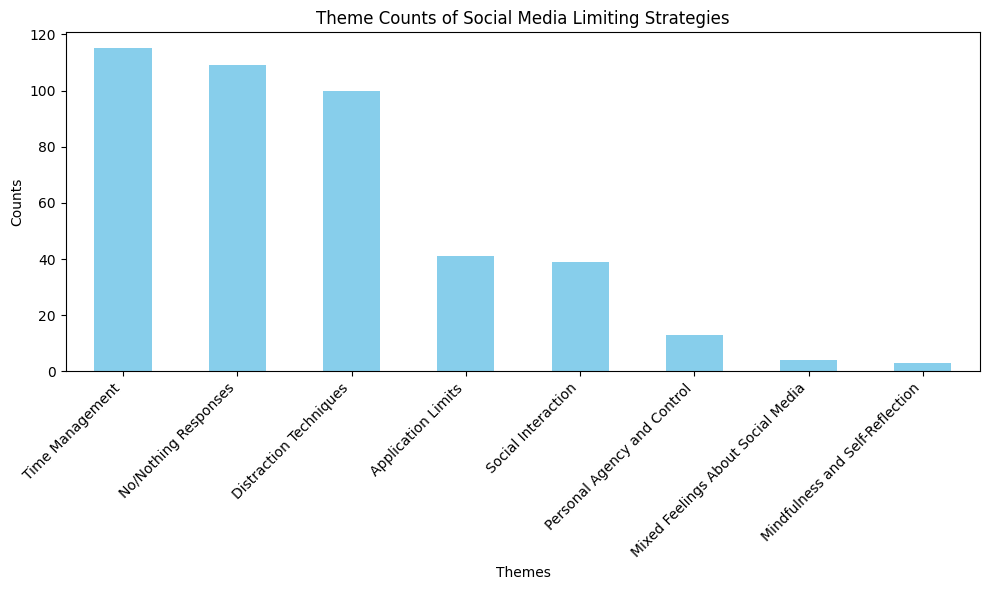

In [7]:
# Step 6: Visualization
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue')
plt.title('Theme Counts of Social Media Limiting Strategies')
plt.xlabel('Themes')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Step 7: Calculate Percentage of Each Theme
total_responses = len(df)
theme_percentage = (theme_counts / total_responses) * 100

# Display theme percentages
print("Theme percentages:")
print(theme_percentage)


Theme percentages:
themes
Time Management                      13.788969
No/Nothing Responses                 13.069544
Distraction Techniques               11.990408
Application Limits                    4.916067
Social Interaction                    4.676259
Personal Agency and Control           1.558753
Mixed Feelings About Social Media     0.479616
Mindfulness and Self-Reflection       0.359712
Name: count, dtype: float64


### identifying which themes are the most dominant\

In [16]:
# Step 8:Dominant themes analysis
dominant_themes = theme_counts.head()
print("Dominant Themes:")
print(dominant_themes)


Dominant Themes:
themes
Time Management           115
No/Nothing Responses      109
Distraction Techniques    100
Application Limits         41
Social Interaction         39
Name: count, dtype: int64


### Now we’ll explore how often themes appear together. This can reveal patterns where certain strategies are used in conjunction\

In [17]:
# Step 9:Co-occurring themes analysis
from itertools import combinations
from collections import Counter

# Count co-occurring themes
co_occurrences = Counter()
for theme_list in df['themes']:
    if len(theme_list) > 1:
        co_occurrences.update(combinations(sorted(theme_list), 2))

# Display the most common co-occurrences
print("Most common co-occurring themes:")
print(co_occurrences.most_common(10))


Most common co-occurring themes:
[(('Distraction Techniques', 'Social Interaction'), 39), (('Distraction Techniques', 'Time Management'), 13), (('Application Limits', 'Time Management'), 8), (('No/Nothing Responses', 'Time Management'), 7), (('Personal Agency and Control', 'Time Management'), 6), (('Social Interaction', 'Time Management'), 5), (('Distraction Techniques', 'Personal Agency and Control'), 2), (('Application Limits', 'Distraction Techniques'), 2), (('Application Limits', 'Mixed Feelings About Social Media'), 1), (('Mixed Feelings About Social Media', 'Time Management'), 1)]


In [18]:
# Step 10:Co-occurring themes analysis

# Rare themes analysis
rare_themes = theme_counts.tail()
print("Rare Themes:")
print(rare_themes)


Rare Themes:
themes
Application Limits                   41
Social Interaction                   39
Personal Agency and Control          13
Mixed Feelings About Social Media     4
Mindfulness and Self-Reflection       3
Name: count, dtype: int64


### themes that appear rarely, which could provide insights into unique or lesser-known strategies\

In [11]:
# Rare themes analysis
rare_themes = theme_counts.tail()
print("Rare Themes:")
print(rare_themes)


Rare Themes:
themes
Application Limits                   41
Social Interaction                   39
Personal Agency and Control          13
Mixed Feelings About Social Media     4
Mindfulness and Self-Reflection       3
Name: count, dtype: int64


### For qualitative analysis, we can pull sample responses that were coded into each theme. This gives context to the numbers\

In [12]:
# Example quotes for each theme
for theme in theme_counts.index:
    print(f"\nExamples for theme: {theme}")
    sample_responses = df[df['themes'].apply(lambda x: theme in x)]['What methods, if any, do you use to limit your social media access?'].head(3)
    for response in sample_responses:
        print(f"- {response}")



Examples for theme: Time Management
- Use the restrictions in Apple settings (from Settings > Screen Time > App Limits)
- Time management
- Setting a timer for me on the mobile phone at such and such an hour. I will stop using the mobile phone, or move it away from the place where I am sitting. For example, put it on the bed and sit at the desk away from it to complete tasks, and so on. Put it on silent at times that require me to study or work on something important at that time. So as not to distract me

Examples for theme: No/Nothing Responses
- nothing
- Honestly, there is nothing wrong with it, but if I have a job and I have to deliver it, I usually stay away from them
- nothing

Examples for theme: Distraction Techniques
- I turn off my phone and occupy myself with studying, reading, or anything else
- Sitting with my family and studying helps me leave my phone
- Trying to get busy reading the Qur’an and some books

Examples for theme: Application Limits
- Delete the app forever

### We can update the visualization to display percentages instead of counts.

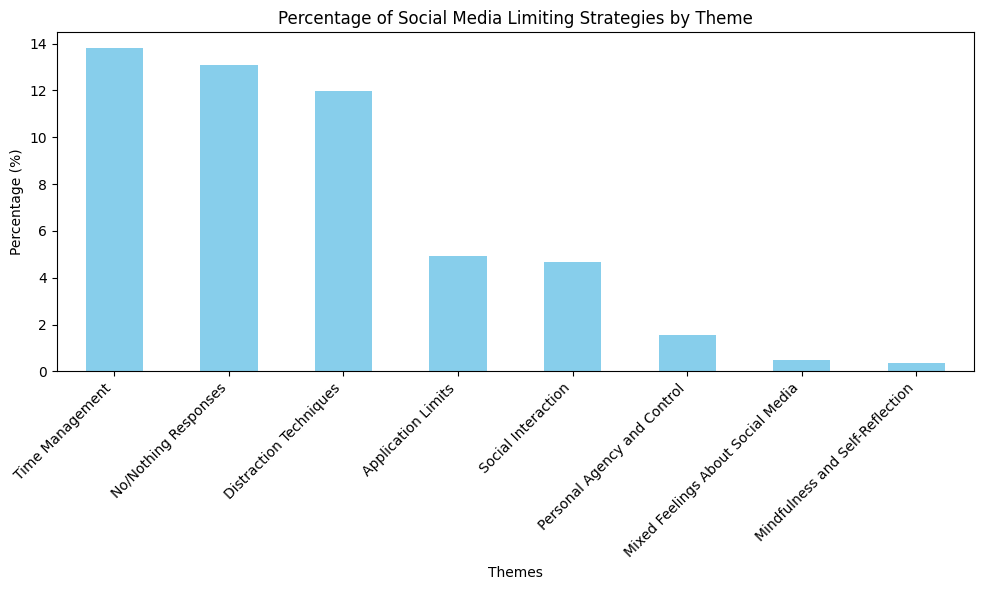

In [14]:
# Step 8: Visualization of Percentages
plt.figure(figsize=(10, 6))
theme_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Social Media Limiting Strategies by Theme')
plt.xlabel('Themes')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
